## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Compute the camera calibration using chessboard images

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import os
%matplotlib inline

#### Find corners of the calibration images

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Create the test_images_output directory.
if not os.path.exists("drawn_chessboards_corners_output"):
    os.makedirs("drawn_chessboards_corners_output")

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        drawn_img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        # Extract filename from path 
        # (See https://stackoverflow.com/questions/8384737/extract-file-name-from-path-no-matter-what-the-os-path-format)
        head, tail = os.path.split(fname)
        # Save the drawn images to a folder to visualize the result
        mpimg.imsave("drawn_chessboards_corners_output/" + tail, img)

#### Correct for distortion

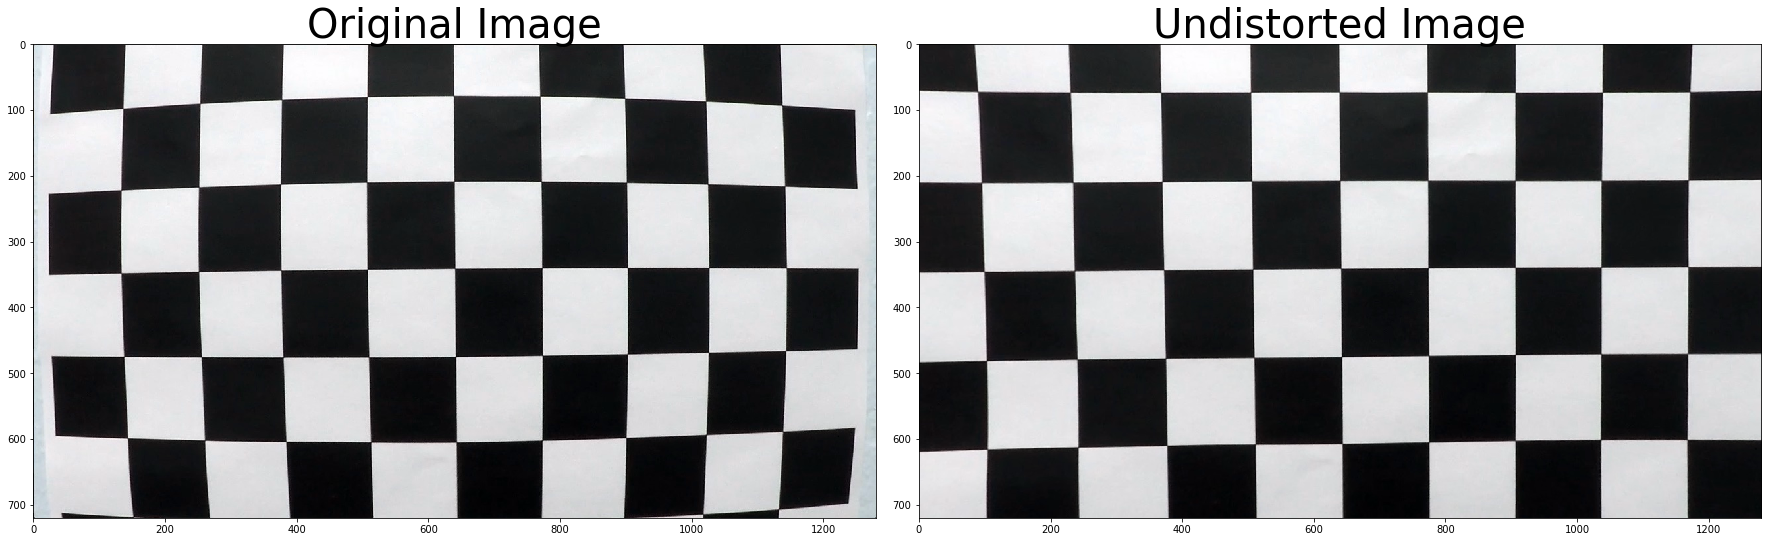

In [9]:
'''
Take an image, object points and image points and perform 
the camera calibration and image distortion correction. 

Return the undistorted image
'''
def cal_undistort(img, objpoints, imgpoints):
    # Calibrate the camera given object points, image points and the shape of the grayscale image.
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    # Undistort the image
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

distorted_image = cv2.imread('./camera_cal/calibration1.jpg')
undistorted = cal_undistort(distorted_image, objpoints, imgpoints)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
fig.tight_layout()

ax1.imshow(distorted_image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=40)
fig.set_facecolor("white")
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## And so on and so forth...